In [23]:
# Cell 1: Imports
import os
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

# Download NLTK data (run once)
nltk.download('punkt', download_dir='~/nltk_data')  # Tokenizers
nltk.download('stopwords', download_dir='~/nltk_data')  # Stopwords
nltk.download('punkt_tab', download_dir='~/nltk_data')  # Language-specific Punkt data
nltk.data.path.append('~/nltk_data')  # Add custom path (Mac/Linux, adjust for Windows if needed)

# Verify the path
print("NLTK Data Path:", nltk.data.path)

[nltk_data] Downloading package punkt to ~/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ~/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to ~/nltk_data...


NLTK Data Path: ['/Users/rashidkarimov/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.13/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.13/share/nltk_data', '/Library/Frameworks/Python.framework/Versions/3.13/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '~/nltk_data', '~/nltk_data']


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
# Cell 2: Data Loading Function (Copied from notebook.ipynb)
def load_data(path, label):
    reviews = []
    for filename in os.listdir(path):
        with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
            reviews.append(f.read())
    return pd.DataFrame({'review': reviews, 'label': label})

In [25]:
# Cell 3: Load Training Data
train_pos_path = '../data/raw/aclImdb/train/pos'
train_neg_path = '../data/raw/aclImdb/train/neg'
train_pos = load_data(train_pos_path, 'positive')
train_neg = load_data(train_neg_path, 'negative')
train_data = pd.concat([train_pos, train_neg], ignore_index=True)

Sample positive review:
 For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.

Sample negative review:
 Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.

Average review length: 233.7872


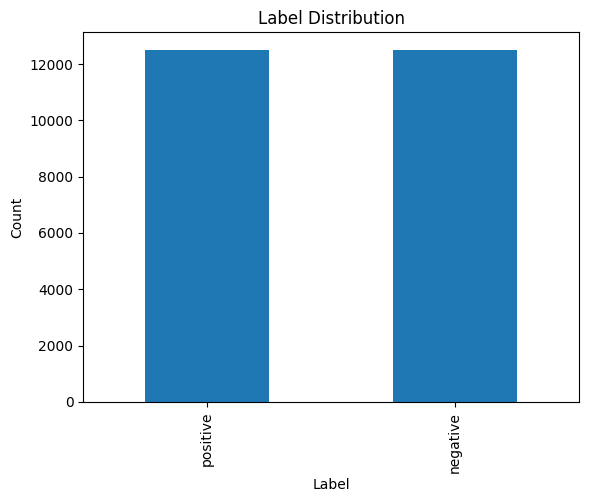

In [26]:
# Cell 4: Quick EDA
print("Sample positive review:\n", train_data[train_data['label'] == 'positive']['review'].iloc[0])
print("\nSample negative review:\n", train_data[train_data['label'] == 'negative']['review'].iloc[0])
train_data['review_length'] = train_data['review'].apply(lambda x: len(x.split()))
print("\nAverage review length:", train_data['review_length'].mean())
train_data['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.savefig('../output/figures/label_distribution.png')
plt.show()

In [29]:
# Cell 5: Preprocessing Function (with error handling)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    try:
        text = re.sub(r'<[^>]+>', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word not in stop_words and word]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error preprocessing text: {e}")
        return ""

In [30]:
# Cell 6: Apply Preprocessing
train_data['clean_review'] = train_data['review'].apply(preprocess_text)

In [32]:
# Cell 7: Verify Preprocessed Data
print("Original vs. Cleaned Reviews:")
print(train_data[['review', 'clean_review']].head())
train_data['clean_length'] = train_data['clean_review'].apply(lambda x: len(x.split()))
print("\nAverage cleaned review length:", train_data['clean_length'].mean())

Original vs. Cleaned Reviews:
                                              review  \
0  For a movie that gets no respect there sure ar...   
1  Bizarre horror movie filled with famous faces ...   
2  A solid, if unremarkable film. Matthau, as Ein...   
3  It's a strange feeling to sit alone in a theat...   
4  You probably all already know this by now, but...   

                                        clean_review  
0  movie gets respect sure lot memorable quotes l...  
1  bizarre horror movie filled famous faces stole...  
2  solid unremarkable film matthau einstein wonde...  
3  strange feeling sit alone theater occupied par...  
4  probably already know 5 additional episodes ne...  

Average cleaned review length: 121.16
